In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from datetime import datetime

%matplotlib inline

In [171]:
df_eng = pd.read_csv('takehome_user_engagement.csv')
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [172]:
df_user = pd.read_csv('takehome_users.csv',encoding='latin-1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [173]:
df_eng.info()
#no missing value in df_eng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [174]:
df_user.info()
#some missing value
#There are some users ever used the system (null value in last_session_creation_time column)
#invited_by_user_id has null values, since this is not applicable for some users. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [175]:
#converting time_stamp to date time
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])


2010-09-10 01:01:22


In [180]:
df_user['last_session_creation_time'] = pd.to_datetime(df_user['last_session_creation_time'], unit='s')
df_user['creation_time'] = pd.to_datetime(df_user.creation_time)

In [181]:
# put zero for null values 
df_user = df_user.fillna(0)

In [182]:
#  How  accounts  were  created?
# Majority of the users created their accounts after being invited to an organization. These are full members. 
# Other sources are almost equal to each other, e.g. about 17%-18% (except the signed up using Google Authentication- 13%)

df_user['creation_source'].value_counts()/len(df_user['object_id'].unique())

ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

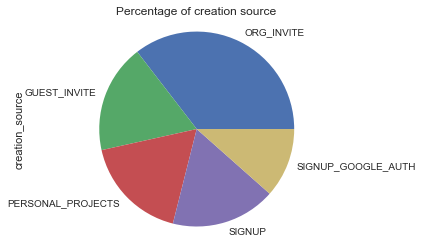

In [183]:
# A pie chart

df_user['creation_source'].value_counts().plot(kind='pie')
plt.title('Percentage of creation source')
plt.axis('equal')

plt.show()

In [184]:
# What organization has the most users?
# There are 416 unique organizations and most users belong to organization id 1, 2, 3 and 4
df_user['org_id'].value_counts().head(10)


0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [185]:
len(df_user['org_id'].unique())

417

In [186]:
# Some users are inveted by another users. Who invited most users?
df_user['invited_by_user_id'].value_counts().head(10)


0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [187]:
 print(df_user[(df_user['object_id'] == 10741)]['name'] + ' is the user who invited most')


10740    Tennant Piper is the user who invited most
Name: name, dtype: object


In [188]:
# Percentage of users who opted in to mailing list
df_user['opted_in_to_mailing_list'].value_counts()/ len(df_user['object_id'].unique())
#Only about 25% of users prefer to receive marketing emails.

0    0.7505
1    0.2495
Name: opted_in_to_mailing_list, dtype: float64

In [189]:
# Percentage of users who are  on   the   regular marketing   email   drip  
df_user['enabled_for_marketing_drip'].value_counts()/ len(df_user['object_id'].unique())
#Only 15% of users are on the regular marketing email drip  

0    0.850667
1    0.149333
Name: enabled_for_marketing_drip, dtype: float64

In [190]:
#Defining an "adopted   user" as   a   user   who   has  logged   into   the   product   
#on   three   separate  days   in   at   least   one   seven day   period 


In [191]:
#Most active users. These users may or may not be adopted users. 
df_eng.groupby(['user_id']).sum().sort_values(['visited'],ascending=False).head(10)

,visited
user_id,
3623,606
906,600
1811,593
7590,590
8068,585
9402,581
4022,580
3269,566
9312,547


In [192]:
# About 74% of active users used the system more than 3.
print (str(len(df_eng.groupby(['user_id']).sum()>=3 )*100/ len(df_user['object_id'].unique()))+'%'
       + ' of users used the system more than 3 times')

73.525% of users used the system more than 3 times


In [193]:
df_eng.groupby(['user_id','time_stamp']).count()
#A quick observation: As seen below, user 2 is an adopted users (login 3 times between 2014-02-03 and 2014-02-10.
# User 11991 (at the tail of the data) is not an adopted users although he used the system more than 3. 

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1
        2013-12-31 03:45:04        1
        2014-01-08 03:45:04        1
        2014-02-03 03:45:04        1
        2014-02-08 03:45:04        1
        2014-02-09 03:45:04        1
        2014-02-13 03:45:04        1
        2014-02-16 03:45:04        1
        2014-03-09 03:45:04        1
        2014-03-13 03:45:04        1
        2014-03-31 03:45:04        1
3       2013-03-19 23:14:52        1
4       2013-05-22 08:09:28        1
5       2013-01-22 10:14:20        1
6       2013-12-19 03:37:06        1
7       2012-12-20 13:24:32        1
10      2013-01-16 22:08:03        1
        2013-01-22 22:08:03        1
        2013-01-30 22:08:03        1
        2013-02-04 22:08:03        1
        2013-02-06 22:08:03        1
        2013-02-14 22:08:03        1
        2013-02-17 22:08:03        1
        2013-02-19 22:08:03        1
        2013-02-26 22:08:03        1
        2013-03-01 22:08:03        1
...                              ...
11988   2014-04-28 11:04:47        1
        2014-04-29 11:04:47        1
        2014-04-30 11:04:47        1
        2014-05-04 11:04:47        1
        2014-05-08 11:04:47        1
        2014-05-14 11:04:47        1
        2014-05-17 11:04:47        1
        2014-05-18 11:04:47        1
        2014-05-19 11:04:47        1
        2014-05-20 11:04:47        1
        2014-05-21 11:04:47        1
        2014-05-23 11:04:47        1
        2014-05-24 11:04:47        1
        2014-05-26 11:04:47        1
        2014-05-27 11:04:47        1
        2014-06-01 11:04:47        1
11989   2013-09-07 11:24:33        1
11990   2013-07-06 21:00:48        1
11991   2014-04-20 14:22:45        1
        2014-04-25 14:22:45        1
        2014-04-28 14:22:45        1
        2014-05-17 14:22:45        1
        2014-05-30 14:22:45        1
11992   2014-04-11 19:39:56        1
11995   2013-10-22 13:33:17        1
11996   2013-09-06 06:14:15        1
11997   2013-01-15 18:28:37        1
11998   2014-04-27 12:45:16        1
11999   2012-06-02 11:55:59        1
12000   2014-01-26 08:57:12        1

[207917 rows x 1 columns]

In [194]:
df_eng.index = pd.to_datetime(df_eng.time_stamp, unit='D') #to use TimeGrouper in the next cell
df_eng.head()


,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [195]:
#How many times each user log-in in 7 days period.eg. user id 2 used the system 3 times starting the day 2014-02-06,
df_eng7days = df_eng.groupby(['user_id', pd.TimeGrouper(freq='7D')]).sum()
df_eng7days

visited
user_id time_stamp                  
1       2014-04-17 08:20:06        1
2       2013-11-14 08:20:06        1
        2013-11-28 08:20:06        1
        2013-12-05 08:20:06        1
        2013-12-19 08:20:06        1
        2013-12-26 08:20:06        1
        2014-01-02 08:20:06        1
        2014-01-30 08:20:06        1
        2014-02-06 08:20:06        3
        2014-02-13 08:20:06        1
        2014-03-06 08:20:06        2
        2014-03-27 08:20:06        1
3       2013-03-14 08:20:06        1
4       2013-05-16 08:20:06        1
5       2013-01-17 08:20:06        1
6       2013-12-12 08:20:06        1
7       2012-12-20 08:20:06        1
10      2013-01-10 08:20:06        1
        2013-01-17 08:20:06        1
        2013-01-24 08:20:06        1
        2013-01-31 08:20:06        2
        2013-02-14 08:20:06        3
        2013-02-21 08:20:06        1
        2013-02-28 08:20:06        3
        2013-03-07 08:20:06        1
        2013-03-14 08:20:06        3
        2013-03-21 08:20:06        2
        2013-04-04 08:20:06        1
        2013-04-11 08:20:06        4
        2013-04-18 08:20:06        2
...                              ...
11981   2013-03-28 08:20:06        1
11982   2013-12-05 08:20:06        1
11983   2013-07-25 08:20:06        1
11984   2014-02-06 08:20:06        1
11986   2012-06-28 08:20:06        1
11987   2013-03-14 08:20:06        1
11988   2014-03-13 08:20:06        3
        2014-03-20 08:20:06        2
        2014-03-27 08:20:06        3
        2014-04-03 08:20:06        1
        2014-04-10 08:20:06        4
        2014-04-24 08:20:06        4
        2014-05-01 08:20:06        1
        2014-05-08 08:20:06        2
        2014-05-15 08:20:06        5
        2014-05-22 08:20:06        4
        2014-05-29 08:20:06        1
11989   2013-09-05 08:20:06        1
11990   2013-07-04 08:20:06        1
11991   2014-04-17 08:20:06        1
        2014-04-24 08:20:06        2
        2014-05-15 08:20:06        1
        2014-05-29 08:20:06        1
11992   2014-04-10 08:20:06        1
11995   2013-10-17 08:20:06        1
11996   2013-09-05 08:20:06        1
11997   2013-01-10 08:20:06        1
11998   2014-04-24 08:20:06        1
11999   2012-05-31 08:20:06        1
12000   2014-01-23 08:20:06        1

[68516 rows x 1 columns]

In [196]:
df_eng7days.columns

Index(['visited'], dtype='object')

In [197]:
df_adopted = df_eng7days.query('visited>2')
df_adopted = df_adopted.reset_index()
df_adopted

,user_id,time_stamp,visited
0,2,2014-02-06 08:20:06,3
1,10,2013-02-14 08:20:06,3
2,10,2013-02-28 08:20:06,3
3,10,2013-03-14 08:20:06,3
4,10,2013-04-11 08:20:06,4
5,10,2013-04-25 08:20:06,4
6,10,2013-05-02 08:20:06,5
7,10,2013-05-09 08:20:06,3
8,10,2013-05-23 08:20:06,4
9,10,2013-06-06 08:20:06,4


In [198]:
df_adopted = df_adopted.groupby('user_id').sum()
#df_adopted = df_adopted.reset_index()
df_adopted.head()


,visited
user_id,
2,3
10,257
42,321
43,4
53,3


In [199]:
df_adopted = df_adopted.reset_index()
df_adopted['adopted']=1
df_adopted

,user_id,visited,adopted
0,2,3,1
1,10,257,1
2,42,321,1
3,43,4,1
4,53,3,1
5,63,348,1
6,69,497,1
7,74,32,1
8,81,46,1
9,82,162,1


In [200]:
# merge users and adopted users 
df_new = df_user.merge(df_adopted, left_on='object_id', right_on='user_id', how='outer')
df_new

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,NaN,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2.0,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,NaN,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,NaN,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,NaN,NaN,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,NaN,NaN,NaN
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0.0,NaN,NaN,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,0.0,NaN,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,0.0,NaN,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,10.0,257.0,1.0


In [201]:
#user_id column is reduntant
df_new.drop('user_id', axis=1, inplace=True)

# replace null-values in visited column with zero
df_new = df_new.fillna(0)

In [203]:
#A new variable: 
df_new['active_days'] = df_new['last_session_creation_time'] - df_new['creation_time']


df_new['active_days'] = df_new['active_days'].astype(pd.Timedelta).apply(lambda l: l.days)



In [207]:
from sklearn.preprocessing import LabelEncoder

df = df_new
encoder = LabelEncoder()
df['creation_source'] = encoder.fit_transform(df_new['creation_source'])


In [218]:
df['creation_source'].value_counts()
#ORG_INVITE =1         
#GUEST_INVITE  =2      
#PERSONAL_PROJECTS =3   
#SIGNUP =4              
#SIGNUP_GOOGLE_AUTH=5   

1    4254
0    2163
2    2111
3    2087
4    1385
Name: creation_source, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#For the analysis, some columns are not needed like email, name, dates,
#org_id is also skipped since there are too many different organizations. It doesn't have any prediction power.
#visited also dropped since it is used to determine the adopted users.
x = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'active_days']]
y = (df['adopted'])

# Split the data into a training and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)
y_pred_log = clf_log.predict(x_test)

print('Confusion matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_log))

print('Accuracy: '+str(accuracy_score(y_test, y_pred_log)))


print("Regression coefficients: ", clf.coef_)


Confusion matrix for Logistic Regression
[[2104   19]
 [  31  246]]
Accuracy: 0.979166666667
Regression coefficients:  [[-1.02561825 -0.61952996 -0.36470272  2.79107104  0.00804859]]


In [222]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier with criterion gini index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

#Prediction for Decision Tree classifier with criterion as gini index
y_pred = clf_gini.predict(x_test)
gini_importances = clf_gini.feature_importances_
indices = np.argsort(gini_importances)[::-1]
features = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'active_days' ]

# Print the feature ranking
print("Feature ranking:")

for i, val in enumerate(clf_gini.feature_importances_):
    print("{:20}{:3f}".format(features[i], val))
    

Feature ranking:
creation_source     0.003836
opted_in_to_mailing_list0.001865
enabled_for_marketing_drip0.000935
active_days         0.993364


In [224]:
print('Confusion matrix for Decision Tree Classifier with criterion gini index')
print(confusion_matrix(y_test, y_pred))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred)))


Confusion matrix for Decision Tree Classifier with criterion gini index
[[2100   23]
 [  27  250]]
Test accuracy: 0.979166666667


Conclusion:

Logistics Regression is used to analyze the data since the target variable, adopted or not is binary. Among the features in users data, 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip' are selected. In addition, a new feature  'active_days' which is equal to the number of days between the day account is created and the day last login occured is added to the analysis. Logistic regression yields an perfect accuracy score equal to 98%. 

Decision Tree Classifier also yields similar result. 

When feature ranking is taken into consideration, it is seen that active_days has the highest gini index. 
Observing Logistic regression on the other hand reveals that enable for marketing drip is the feature which has the largest affect on the target feature. 
